In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageColor
import os
import csv

def calculate_text_size(text, font):
    # calculate text size based on font properties
    ascent, descent = font.getmetrics()
    text_width = font.getmask(text).getbbox()[2]
    text_height = ascent + descent
    return text_width, text_height

def get_brightness(color):
    # Calculate brightness of a color (grayscale value) for the text
    r, g, b = ImageColor.getrgb(color)
    return (r * 299 + g * 587 + b * 114) / 1000 


def visualize_image(filename, csv_filename):
        # Open image
        image_path = filename
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)

        # Read bounding box information from CSV file
        if os.path.getsize(csv_filename) > 0:
            with open(csv_filename, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                #next(csvreader)  # Skip header row
                for row in csvreader:
                    if row:
                        xmin, ymin, xmax, ymax = map(int, row[0:4])
                        class_name = row[4]
        
                        # Define colors for different classes
                        class_colors = {
                            'danger': 'yellow',
                            'interdiction': 'purple',
                            'obligation': 'blue',
                            'stop': 'magenta',
                            'ceder': 'cyan',
                            'frouge': 'red',
                            'forange': 'orange',
                            'fvert': 'green'
                        }
        
                         # Define brightness threshold for determining text color
                        brightness_threshold = 150  
        
                        # Get bounding box color
                        box_color = class_colors.get(class_name, 'white') #white is the de
        
                        # Determine text color based on brightness of box color
                        text_color = 'black' if get_brightness(box_color) > brightness_threshold else 'white'
        
                        # Draw bounding box
                        draw.rectangle([(xmin, ymin), (xmax, ymax)], outline=box_color)
        
                        # Define font and size
                        font_size = 30 # Adjust the font size here
                        font = ImageFont.truetype("arial.ttf", font_size)
        
                        # Get text size
                        text_width, text_height = calculate_text_size(class_name, font)
        
                        # Draw filled rectangle as background for class name
                        draw.rectangle([(xmin, ymin - text_height), (xmin + text_width, ymin)], fill=box_color)
        
                        # Draw class name text on top of the filled rectangle
                        draw.text((xmin, ymin - text_height), class_name, fill=text_color, font=font)
        return img

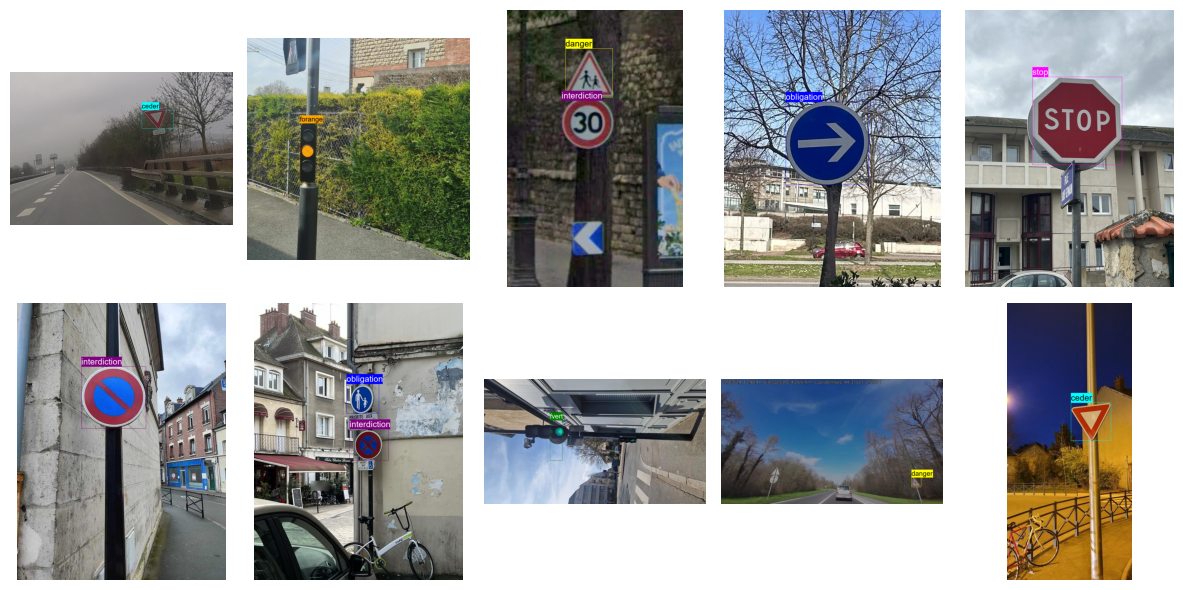

In [2]:
import os
import random
import matplotlib.pyplot as plt


# Affiche au hasard des images positives de l'ensemble d'apprentissage
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for ax in axs.ravel():
    images_dir = os.path.join("train", "images")
    labels_dir = os.path.join("train", "labels")
    image_name = random.choice(os.listdir(images_dir))
    image_path = os.path.join(images_dir, image_name)
    csv_path = os.path.join(labels_dir, image_name[:-4] + ".csv")   
    # Call visualize_image function to modify the image
    image_to_display = visualize_image(image_path, csv_path)
    
    # Display the modified image
    ax.imshow(image_to_display)
    ax.axis('off')
        
plt.tight_layout()
plt.show()


train\images\0001.jpg


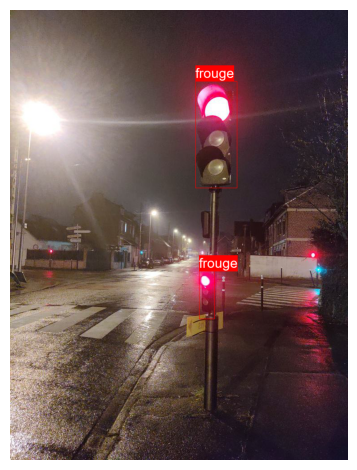

In [3]:
import os
import random
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1)

images_dir = os.path.join("train", "images")
labels_dir = os.path.join("train", "labels")
image_name = "0001.jpg"
image_path = os.path.join(images_dir, image_name)
print(image_path)
csv_path = os.path.join(labels_dir, image_name[:-4] + ".csv")   
    # Call visualize_image function to modify the image
image_to_display = visualize_image(image_path, csv_path)
    
    # Display the modified image
axs.imshow(image_to_display)
axs.axis('off')
        
plt.tight_layout()
plt.show()


In [7]:
import os
import csv

def compter_panneaux(images_path, labels_path):
    # Dictionnaire pour compter les panneaux
    panneaux_count = {}

    # Liste des fichiers images
    image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

    # Parcourir chaque image
    for image_file in image_files:
        # Obtenir le nom de base sans l'extension
        base_name = os.path.splitext(image_file)[0]
        
        # Chemin vers le fichier label correspondant
        label_file = os.path.join(labels_path, base_name + '.csv')
        
        # Vérifier si le fichier label existe et n'est pas vide
        if os.path.exists(label_file) and os.path.getsize(label_file) > 0:
            # Lire le fichier CSV
            with open(label_file, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                # Parcourir chaque ligne du fichier CSV
                for row in csvreader:
                    if len(row) >= 5:  # Vérifier que la ligne a au moins 5 colonnes
                        # Supposons que la classe du panneau est dans la 5ème colonne (index 4)
                        class_name = row[4]
                        if class_name in panneaux_count:
                            panneaux_count[class_name] += 1
                        else:
                            panneaux_count[class_name] = 1

    # Afficher le résultat
    for panneau, count in panneaux_count.items():
        print(f"Nombre de panneaux '{panneau}' : {count}")

# Chemin vers le dossier des images et des labels
images_path = 'train/images'
labels_path = 'train/labels'

# Appeler la fonction
compter_panneaux(images_path, labels_path)


Nombre de panneaux 'frouge' : 81
Nombre de panneaux 'ceder' : 120
Nombre de panneaux 'interdiction' : 289
Nombre de panneaux 'fvert' : 94
Nombre de panneaux 'stop' : 100
Nombre de panneaux 'danger' : 155
Nombre de panneaux 'obligation' : 117
Nombre de panneaux 'empty' : 54
Nombre de panneaux 'forange' : 54
Nombre de panneaux 'ff' : 10


In [8]:
#Code pour rajouter class empty aux images sans panneaux, et pour corriger un stop mal orthographié
def add_empty_label_to_empty_csv_files(labels_path):
    # Liste des fichiers CSV dans le répertoire des labels
    csv_files = [f for f in os.listdir(labels_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        csv_path = os.path.join(labels_path, csv_file)
        # Vérifie si le fichier est vide ou n'a que des nouvelles lignes
        with open(csv_path, 'r') as file:
            content = file.read().strip()

        if content == "" or content == "empty":
            with open(csv_path, 'w', newline='') as csvfile:
                csvwriter = csv.writer(csvfile)
                # Ajoute l'entrée "empty" dans le fichier CSV vide
                csvwriter.writerow(["X", "X", "X", "X", "empty"])
        else:
            # Vérifie et corrige l'annotation "Stop"
            with open(csv_path, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                rows = list(csvreader)
                for row in rows:
                    if len(row) > 4 and row[4] == "Stop":
                        row[4] = "stop"

            # Écrit les lignes corrigées dans le fichier CSV
            with open(csv_path, 'w', newline='') as csvfile:
                csvwriter = csv.writer(csvfile)
                csvwriter.writerows(rows)

add_empty_label_to_empty_csv_files("train/labels")


In [9]:
import os
import csv
import shutil
from PIL import Image
import numpy as np

def add_noise(image):
    """ Ajouter du bruit gaussien à l'image. """
    img_array = np.array(image)
    noise = np.random.normal(loc=0.0, scale=25, size=img_array.shape)
    noisy_img_array = np.clip(img_array + noise, 0, 255)
    return Image.fromarray(noisy_img_array.astype('uint8'))

def mirror_image(image):
    """ Retourner l'image horizontalement. """
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def update_csv(original_csv, new_csv, image_width):
    with open(original_csv, 'r') as infile, open(new_csv, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        for row in reader:
            if row:
                # Convertir les coordonnées en entiers
                x1, y1, x2, y2 = map(int, row[:-1])
                label = row[-1]

                # Mettre à jour les coordonnées pour l'image transposée
                new_x1 = image_width - x2
                new_x2 = image_width - x1

                # Écrire la nouvelle ligne dans le fichier CSV
                writer.writerow([new_x1, y1, new_x2, y2, label])


In [10]:
def process_images(image_folder, label_folder, target_image_folder, target_label_folder, target_labels):
    target_labels_set = set(target_labels)
    # Assurer que les dossiers cibles existent
    os.makedirs(target_image_folder, exist_ok=True)
    os.makedirs(target_label_folder, exist_ok=True)

    for filename in os.listdir(image_folder):
        image_path = os.path.join(image_folder, filename)
        label_path = os.path.join(label_folder, filename.replace('.jpg', '.csv'))
        target_image_path = os.path.join(target_image_folder, filename)
        target_label_path = os.path.join(target_label_folder, filename.replace('.jpg', '.csv'))

        # Copier toutes les images et fichiers CSV dans les nouveaux dossiers
        shutil.copy(image_path, target_image_path)
        shutil.copy(label_path, target_label_path)

        # Lire et vérifier les labels
        with open(label_path, 'r') as f:
            labels = [row[-1].lower() for row in csv.reader(f)]
        labels_set = set(labels)
        
        # Vérifier si l'image contient uniquement les panneaux cibles
        if labels_set <= target_labels_set:
            img = Image.open(image_path)
            mirrored_img = mirror_image(img)
            noisy_img = add_noise(mirrored_img)
            noisy_img.save(os.path.join(target_image_folder, filename.replace('.jpg', '_bis.jpg')))
            
            new_csv_path = os.path.join(target_label_folder, filename.replace('.jpg', '_bis.csv'))
            update_csv(label_path, new_csv_path, img.width)

In [12]:
import os
import csv



# Chemin vers le dossier des images et des labels
images_path2 = 'train/images2'
labels_path2 = 'train/labels2'

# Appeler la fonction
compter_panneaux(images_path2, labels_path2)


Nombre de panneaux 'frouge' : 145
Nombre de panneaux 'ceder' : 204
Nombre de panneaux 'interdiction' : 289
Nombre de panneaux 'fvert' : 166
Nombre de panneaux 'stop' : 174
Nombre de panneaux 'danger' : 155
Nombre de panneaux 'obligation' : 209
Nombre de panneaux 'empty' : 54
Nombre de panneaux 'forange' : 93
Nombre de panneaux 'ff' : 10


Classification

In [49]:
import pandas as pd
from skimage import io, color
from skimage.feature import hog
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
import numpy as np
from PIL import Image
import os
import joblib

def load_images_and_labels(image_dir, label_dir):
    data = []
    labels = []
    columns = ['x1', 'y1', 'x2', 'y2', 'label']

    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_dir, filename)
            csv_path = os.path.join(label_dir, filename[:-4] + ".csv")
            
            if not os.path.exists(csv_path):
                continue

            image = io.imread(image_path)
            if len(image.shape) > 2:
                image = color.rgb2gray(image)  # Convertir en niveaux de gris pour HOG

            df = pd.read_csv(csv_path, header=None, names=columns)
            for _, row in df.iterrows():
                label = row['label'].strip()
                if label == 'ff':
                    continue  # Ignorer les labels 'ff'
                
                if label == 'empty':
                    # Diviser l'image en 4 sous-images et utiliser chaque sous-image pour les cas 'empty'
                    height, width = image.shape
                    sub_images = [
                        image[:height//2, :width//2],
                        image[:height//2, width//2:],
                        image[height//2:, :width//2],
                        image[height//2:, width//2:],
                        image[:height//4:, width//4:],
                        image[height//4:, :width//4:]


                    ]
                    for sub_image in sub_images:
                        sub_image_resized = Image.fromarray(sub_image).resize((100, 100))
                        hog_features = hog(np.array(sub_image_resized), orientations=8, pixels_per_cell=(16, 16),
                                           cells_per_block=(1, 1), visualize=False, feature_vector=True)
                        data.append(hog_features)
                        labels.append(label)  # Utiliser le label 'empty' pour chaque sous-image
                else:
                    x1, y1, x2, y2 = int(row['x1']), int(row['y1']), int(row['x2']), int(row['y2'])
                    if x1 >= x2 or y1 >= y2 or x1 < 0 or y1 < 0 or x2 > image.shape[1] or y2 > image.shape[0]:
                        continue
                    roi = image[y1:y2, x1:x2]
                    if roi.size == 0:
                        continue
                    roi_resized = Image.fromarray(roi).resize((100, 100))  # S'assurer que le redimensionnement est correct
                    roi_array = np.array(roi_resized)
                    hog_features = hog(roi_array, orientations=8, pixels_per_cell=(16, 16),
                                       cells_per_block=(1, 1), visualize=False, feature_vector=True)
                    data.append(hog_features)
                    labels.append(label)  # Utiliser le label spécifique du panneau

    return np.array(data, dtype='float64'), np.array(labels)  # Les labels seront convertis séparément

# Chemins vers les dossiers d'images et de labels
image_dir = 'train/images2'
label_dir = 'train/labels2'

# Charger les données
features, target = load_images_and_labels(image_dir, label_dir)

# Encoder les labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Création et entraînement du SVM avec probability=True
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(features, target_encoded)  # Utiliser les labels encodés
print("Le modèle SVM a été entraîné.")

# Sauvegarder le modèle et le label encoder
#joblib.dump(clf, 'svm_model.pkl')
#joblib.dump(label_encoder, 'label_encoder.pkl')


Le modèle SVM a été entraîné.


['label_encoder.pkl']

In [50]:
labels = label_encoder.classes_
print("Les labels du modèle sont :")
print(labels)

Les labels du modèle sont :
['ceder' 'danger' 'empty' 'forange' 'frouge' 'fvert' 'interdiction'
 'obligation' 'stop']


In [51]:
import pandas as pd
from skimage import io, color
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
import numpy as np
from PIL import Image
import os
import joblib

# Fonction pour charger une image et ses labels
def load_image_and_label(image_path, csv_path):
    columns = ['x1', 'y1', 'x2', 'y2', 'label']
    image = io.imread(image_path)
    if len(image.shape) > 2:
        image = color.rgb2gray(image)  # Convertir en niveaux de gris pour HOG
    
    df = pd.read_csv(csv_path, header=None, names=columns)
    return image, df

# Fonction pour préparer les données
def prepare_data(image, row):
    x1, y1, x2, y2 = int(row['x1']), int(row['y1']), int(row['x2']), int(row['y2'])
    if x1 >= x2 or y1 >= y2 or x1 < 0 or y1 < 0 or x2 > image.shape[1] or y2 > image.shape[0]:
        raise ValueError("Invalid coordinates")
    roi = image[y1:y2, x1:x2]
    if roi.size == 0:
        raise ValueError("Empty region of interest")
    roi = Image.fromarray(roi).resize((100, 100))  # Redimensionner à 100x100 pixels
    roi = np.array(roi)
    hog_features = hog(roi, orientations=8, pixels_per_cell=(16, 16),
                       cells_per_block=(1, 1), visualize=False, feature_vector=True)
    return hog_features

# Charger le modèle SVM et le label encoder sauvegardés
clf = joblib.load('svm_model.pkl')  # Remplacez par le chemin de votre modèle sauvegardé
label_encoder = joblib.load('label_encoder.pkl')  # Remplacez par le chemin de votre label encoder sauvegardé

# Tester le modèle sur une image spécifique
test_image_path = os.path.join('val/images', '0039.jpg')
test_csv_path = os.path.join('val/labels', '0039.csv')

# Charger l'image et les labels
test_image, test_df = load_image_and_label(test_image_path, test_csv_path)

# Prédire pour chaque panneau dans l'image
for _, row in test_df.iterrows():
    try:
        hog_features = prepare_data(test_image, row)
        prediction = clf.predict([hog_features])
        predicted_label = label_encoder.inverse_transform(prediction)[0]
        print(f"Vrai label: {row['label']}, Prédiction: {predicted_label}")
    except ValueError as e:
        print(f"Erreur avec les coordonnées {row['x1']},{row['y1']},{row['x2']},{row['y2']}: {e}")


Vrai label: ceder, Prédiction: ceder
Vrai label: obligation, Prédiction: obligation


In [52]:
correct_predictions = 0
total_predictions = 0
val_image_dir = 'val/images'
val_label_dir = 'val/labels'
bad_predictions = []

# Parcourir les images et les fichiers CSV dans le dossier de validation
for filename in os.listdir(val_image_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(val_image_dir, filename)
        csv_path = os.path.join(val_label_dir, filename[:-4] + ".csv")
        
        if not os.path.exists(csv_path):
            continue

        # Charger l'image et les labels
        test_image, test_df = load_image_and_label(image_path, csv_path)

        # Prédire pour chaque panneau dans l'image
        for _, row in test_df.iterrows():
            try:
                hog_features = prepare_data(test_image, row)
                prediction = clf.predict([hog_features])
                predicted_label = label_encoder.inverse_transform(prediction)[0]
                true_label = row['label']
                
                if predicted_label == true_label:
                    correct_predictions += 1
                else:
                    bad_predictions.append((filename, row['x1'], row['y1'], row['x2'], row['y2'], true_label, predicted_label))
                
                total_predictions += 1
            except ValueError as e:
                print(f"Erreur avec les coordonnées {row['x1']},{row['y1']},{row['x2']},{row['y2']}: {e}")

# Calculer et afficher le taux de bonnes prédictions
accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
print(f"Taux de bonnes prédictions: {accuracy:.2%}")

# Afficher les mauvaises prédictions
print("Mauvaises prédictions :")
for bad_pred in bad_predictions:
    print(f"Image: {bad_pred[0]}, Coordonnées: ({bad_pred[1]}, {bad_pred[2]}, {bad_pred[3]}, {bad_pred[4]}), Vrai label: {bad_pred[5]}, Prédiction: {bad_pred[6]}")

Taux de bonnes prédictions: 83.19%
Mauvaises prédictions :
Image: 0004.jpg, Coordonnées: (69, 932, 100, 986), Vrai label: interdiction, Prédiction: empty
Image: 0054.jpg, Coordonnées: (14, 369, 61, 689), Vrai label: frouge, Prédiction: empty
Image: 0088.jpg, Coordonnées: (1, 226, 107, 293), Vrai label: ff, Prédiction: empty
Image: 0101.jpg, Coordonnées: (320, 202, 695, 571), Vrai label: interdiction, Prédiction: obligation
Image: 0131.jpg, Coordonnées: (395, 346, 596, 530), Vrai label: interdiction, Prédiction: obligation
Image: 0196.jpg, Coordonnées: (447, 201, 527, 429), Vrai label: frouge, Prédiction: fvert
Image: 0257.jpg, Coordonnées: (478, 904, 556, 1000), Vrai label: frouge, Prédiction: obligation
Image: 0284.jpg, Coordonnées: (158, 362, 179, 408), Vrai label: frouge, Prédiction: empty
Image: 0428.jpg, Coordonnées: (338, 317, 478, 577), Vrai label: forange, Prédiction: fvert
Image: 0444.jpg, Coordonnées: (320, 78, 510, 453), Vrai label: frouge, Prédiction: fvert
Image: 0444.jpg,

In [53]:
correct_predictions = 0
total_predictions = 0
val_image_dir = 'train/images'
val_label_dir = 'train/labels'
bad_predictions = []

# Parcourir les images et les fichiers CSV dans le dossier de validation
for filename in os.listdir(val_image_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(val_image_dir, filename)
        csv_path = os.path.join(val_label_dir, filename[:-4] + ".csv")
        
        if not os.path.exists(csv_path):
            continue

        # Charger l'image et les labels
        test_image, test_df = load_image_and_label(image_path, csv_path)

        # Prédire pour chaque panneau dans l'image
        for _, row in test_df.iterrows():
            try:
                hog_features = prepare_data(test_image, row)
                prediction = clf.predict([hog_features])
                predicted_label = label_encoder.inverse_transform(prediction)[0]
                true_label = row['label']
                
                if predicted_label == true_label:
                    correct_predictions += 1
                else:
                    bad_predictions.append((filename, row['x1'], row['y1'], row['x2'], row['y2'], true_label, predicted_label))
                
                total_predictions += 1
            except ValueError as e:
                continue
                #print(f"Erreur avec les coordonnées {row['x1']},{row['y1']},{row['x2']},{row['y2']}: {e}")

# Calculer et afficher le taux de bonnes prédictions
accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
print(f"Taux de bonnes prédictions: {accuracy:.2%}")

# Afficher les mauvaises prédictions
print("Mauvaises prédictions :")
for bad_pred in bad_predictions:
    print(f"Image: {bad_pred[0]}, Coordonnées: ({bad_pred[1]}, {bad_pred[2]}, {bad_pred[3]}, {bad_pred[4]}), Vrai label: {bad_pred[5]}, Prédiction: {bad_pred[6]}")

Taux de bonnes prédictions: 96.54%
Mauvaises prédictions :
Image: 0034.jpg, Coordonnées: (325, 246, 552, 445), Vrai label: interdiction, Prédiction: obligation
Image: 0073.jpg, Coordonnées: (486, 646, 559, 737), Vrai label: ff, Prédiction: empty
Image: 0073.jpg, Coordonnées: (708, 685, 750, 710), Vrai label: ff, Prédiction: frouge
Image: 0079.jpg, Coordonnées: (106, 650, 159, 670), Vrai label: ff, Prédiction: fvert
Image: 0079.jpg, Coordonnées: (212, 625, 233, 641), Vrai label: ff, Prédiction: forange
Image: 0079.jpg, Coordonnées: (250, 651, 277, 666), Vrai label: ff, Prédiction: empty
Image: 0085.jpg, Coordonnées: (70, 390, 116, 419), Vrai label: ff, Prédiction: empty
Image: 0086.jpg, Coordonnées: (77, 657, 138, 689), Vrai label: ff, Prédiction: ceder
Image: 0086.jpg, Coordonnées: (332, 575, 412, 720), Vrai label: ff, Prédiction: empty
Image: 0090.jpg, Coordonnées: (317, 826, 351, 907), Vrai label: ff, Prédiction: empty
Image: 0090.jpg, Coordonnées: (505, 830, 530, 883), Vrai label: f

Detection de panneaux sur l'image

In [72]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
import joblib

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à la taille d'entrée pour HOG
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=8, pixels_per_cell=(16, 16),
                       cells_per_block=(1, 1), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1], step_size):
        for x in range(0, image.width - window_size[0], step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection
def detect_with_window(image, win_size, step_size, confidence_threshold):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        # Si l'image redimensionnée est plus petite que la fenêtre, on arrête
        if resized_image.height < win_size[1] or resized_image.width < win_size[0]:
            break

        # Parcourir l'image avec la fenêtre glissante
        for (x1, y1, x2, y2) in sliding_window(resized_image, step_size, win_size):
            if x2 > resized_image.width or y2 > resized_image.height:
                continue

            # Préparer les données HOG pour la fenêtre courante
            hog_features = prepare_data(resized_image, (x1, y1, x2, y2))
            probabilities = clf.predict_proba([hog_features])[0]
            max_proba = np.max(probabilities)
            
            if max_proba >= confidence_threshold:
                prediction = np.argmax(probabilities)
                predicted_label = label_encoder.inverse_transform([prediction])[0]

                # Ignorer les prédictions avec le label 'empty'
                if predicted_label == 'empty':
                    continue

                # Stocker la prédiction et sa probabilité
                detections.append((max_proba, predicted_label, i, x1, y1, x2, y2))
                
                # Dessiner un rectangle autour de la détection
                draw.rectangle([(x1, y1), (x2, y2)], outline="red", width=2)
    
    return detections

# Paramètres
image_path = 'train/images/0001.jpg'

# Charger l'image
image = Image.open(image_path).convert('RGB')
draw = ImageDraw.Draw(image)

# Charger le modèle et le label encoder
clf = joblib.load('svm_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Paramètres HOG utilisés lors de l'entraînement
pixels_per_cell = (16, 16)
cells_per_block = (1, 1)

# Seuil de confiance
confidence_threshold = 0.4  # Ajustez ce seuil selon vos besoins

# Détection avec des rectangles 100x200
detections_100x200 = detect_with_window(image, (100, 200), 32, confidence_threshold)

# Détection avec des carrés 200x200
detections_200x200 = detect_with_window(image, (200, 200), 32, confidence_threshold)

# Trier les détections par probabilité décroissante
detections_100x200 = sorted(detections_100x200, key=lambda x: x[0], reverse=True)
detections_200x200 = sorted(detections_200x200, key=lambda x: x[0], reverse=True)

# Afficher les 5 meilleures prédictions pour chaque taille de fenêtre
print("Les 5 meilleures prédictions avec des rectangles 100x200 :")
for detection in detections_100x200[:5]:
    print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

print("\nLes 5 meilleures prédictions avec des carrés 200x200 :")
for detection in detections_200x200[:5]:
    print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

# Afficher l'image avec les rectangles
image.show()

print("Détection terminée")


Les 5 meilleures prédictions avec des rectangles 100x200 :
Panneau détecté: fvert, Confiance: 0.80, Échelle: 1, Position: (256, 0)
Panneau détecté: forange, Confiance: 0.77, Échelle: 1, Position: (0, 64)
Panneau détecté: ceder, Confiance: 0.77, Échelle: 0, Position: (384, 384)
Panneau détecté: fvert, Confiance: 0.70, Échelle: 1, Position: (0, 160)
Panneau détecté: fvert, Confiance: 0.70, Échelle: 1, Position: (0, 0)

Les 5 meilleures prédictions avec des carrés 200x200 :
Panneau détecté: frouge, Confiance: 0.60, Échelle: 0, Position: (224, 224)
Panneau détecté: ceder, Confiance: 0.54, Échelle: 0, Position: (128, 768)
Panneau détecté: forange, Confiance: 0.53, Échelle: 0, Position: (512, 544)
Panneau détecté: fvert, Confiance: 0.52, Échelle: 0, Position: (352, 64)
Panneau détecté: fvert, Confiance: 0.51, Échelle: 1, Position: (192, 0)
Détection terminée


Detection avec une fenetre plus grande : 200*200

In [76]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
import joblib
from collections import Counter

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à la taille d'entrée pour HOG
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=8, pixels_per_cell=(16, 16),
                       cells_per_block=(1, 1), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1], step_size):
        for x in range(0, image.width - window_size[0], step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection
def detect_with_window(image, win_size, step_size, confidence_threshold):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        # Si l'image redimensionnée est plus petite que la fenêtre, on arrête
        if resized_image.height < win_size[1] or resized_image.width < win_size[0]:
            break

        # Parcourir l'image avec la fenêtre glissante
        for (x1, y1, x2, y2) in sliding_window(resized_image, step_size, win_size):
            if x2 > resized_image.width or y2 > resized_image.height:
                continue

            # Préparer les données HOG pour la fenêtre courante
            hog_features = prepare_data(resized_image, (x1, y1, x2, y2))
            probabilities = clf.predict_proba([hog_features])[0]
            max_proba = np.max(probabilities)
            
            if max_proba >= confidence_threshold:
                prediction = np.argmax(probabilities)
                predicted_label = label_encoder.inverse_transform([prediction])[0]

                # Ignorer les prédictions avec le label 'empty'
                if predicted_label == 'empty':
                    continue

                # Stocker la prédiction et sa probabilité
                detections.append((max_proba, predicted_label, i, x1, y1, x2, y2))
                
                # Dessiner un rectangle autour de la détection
                draw.rectangle([(x1, y1), (x2, y2)], outline="red", width=2)
    
    return detections

# Fonction pour affiner la détection dans une zone spécifique
def refine_detection(image, box, sizes, step_size, confidence_threshold):
    x1, y1, x2, y2 = box
    refined_detections = []
    for size in sizes:
        win_size = (size, size)
        # Définir une sous-image pour la zone d'intérêt
        sub_image = image.crop((x1, y1, x2, y2))
        for (x1_sub, y1_sub, x2_sub, y2_sub) in sliding_window(sub_image, step_size, win_size):
            if x2_sub > sub_image.width or y2_sub > sub_image.height:
                continue

            # Préparer les données HOG pour la fenêtre courante
            hog_features = prepare_data(sub_image, (x1_sub, y1_sub, x2_sub, y2_sub))
            probabilities = clf.predict_proba([hog_features])[0]
            max_proba = np.max(probabilities)
            
            if max_proba >= confidence_threshold:
                prediction = np.argmax(probabilities)
                predicted_label = label_encoder.inverse_transform([prediction])[0]

                # Ignorer les prédictions avec le label 'empty'
                if predicted_label == 'empty':
                    continue

                # Stocker la prédiction et sa probabilité
                refined_detections.append(predicted_label)
    
    # Compter les occurrences de chaque label dans la zone affinée
    if refined_detections:
        label_counts = Counter(refined_detections)
        most_common_label, count = label_counts.most_common(1)[0]
        return most_common_label, count
    else:
        return None, 0

# Paramètres
image_path = 'train/images/0002.jpg'

# Charger l'image
image = Image.open(image_path).convert('RGB')
draw = ImageDraw.Draw(image)

# Charger le modèle et le label encoder
clf = joblib.load('svm_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Paramètres HOG utilisés lors de l'entraînement
pixels_per_cell = (16, 16)
cells_per_block = (1, 1)

# Seuil de confiance
confidence_threshold = 0.4  # Ajustez ce seuil selon vos besoins

# Détection avec des rectangles 100x200
detections_100x200 = detect_with_window(image, (100, 200), 32, confidence_threshold)

# Détection avec des carrés 200x200
detections_200x200 = detect_with_window(image, (200, 200), 32, confidence_threshold)

# Trier les détections par probabilité décroissante
detections_100x200 = sorted(detections_100x200, key=lambda x: x[0], reverse=True)
detections_200x200 = sorted(detections_200x200, key=lambda x: x[0], reverse=True)

# Afficher les 5 meilleures prédictions pour chaque taille de fenêtre
print("Les 5 meilleures prédictions avec des rectangles 100x200 :")
for detection in detections_100x200[:5]:
    print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

print("\nLes 5 meilleures prédictions avec des carrés 200x200 :")
for detection in detections_200x200[:5]:
    print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

# Affiner la détection dans les zones avec confiance > 75%
for detection in detections_100x200 + detections_200x200:
    if detection[0] > 0.75:
        most_common_label, count = refine_detection(image, (detection[3], detection[4], detection[5], detection[6]), [50, 100, 150], 16, confidence_threshold)
        if most_common_label:
            print(f"Zone affinée - Panneau détecté: {most_common_label}, Occurrences: {count}, Position: ({detection[3]}, {detection[4]})")

# Afficher l'image avec les rectangles
image.show()

print("Détection terminée")


Les 5 meilleures prédictions avec des rectangles 100x200 :
Panneau détecté: danger, Confiance: 1.00, Échelle: 0, Position: (64, 352)
Panneau détecté: danger, Confiance: 0.93, Échelle: 1, Position: (32, 224)
Panneau détecté: danger, Confiance: 0.90, Échelle: 0, Position: (192, 608)
Panneau détecté: danger, Confiance: 0.89, Échelle: 1, Position: (32, 192)
Panneau détecté: danger, Confiance: 0.89, Échelle: 0, Position: (96, 64)

Les 5 meilleures prédictions avec des carrés 200x200 :
Panneau détecté: ceder, Confiance: 0.88, Échelle: 2, Position: (64, 160)
Panneau détecté: ceder, Confiance: 0.85, Échelle: 2, Position: (64, 192)
Panneau détecté: ceder, Confiance: 0.75, Échelle: 0, Position: (512, 704)
Panneau détecté: ceder, Confiance: 0.71, Échelle: 0, Position: (544, 64)
Panneau détecté: ceder, Confiance: 0.70, Échelle: 0, Position: (224, 576)
Zone affinée - Panneau détecté: danger, Occurrences: 5, Position: (64, 352)
Zone affinée - Panneau détecté: forange, Occurrences: 1, Position: (32, 

Remarque actuelle : 
Les rectangles verticaux sont performants pour détecter des feux
Les carrés sont perfermants pour détecter des panneaux normaux
Quel compromis ?